# EDA (Exploratory Data Analysis)

---
In this file, we have performed data analysis from the data already available through kaggle or the data scrapped by us! We are directly using partially or fully cleaned data for the visualizations here. This file does not include scrapping and pre-processing techniques used by us. They can be found in other files.


## Loading the data

In [ ]:
!mkdir data

In [ ]:
!gdown --id 17wIOaLJ8u-F2c55YDh68nrN3DFDaqe83

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17wIOaLJ8u-F2c55YDh68nrN3DFDaqe83
To: /content/world-cup-data.zip
100% 130k/130k [00:00<00:00, 2.75MB/s]


In [ ]:
!unzip world-cup-data.zip

Archive:  world-cup-data.zip
  inflating: batting_avg_cleaned.csv  
  inflating: __MACOSX/._batting_avg_cleaned.csv  
  inflating: bowling_avg_cleaned.csv  
  inflating: __MACOSX/._bowling_avg_cleaned.csv  
  inflating: deliveries.csv          
  inflating: __MACOSX/._deliveries.csv  
  inflating: matches.csv             
  inflating: __MACOSX/._matches.csv  
  inflating: points_table.csv        
  inflating: __MACOSX/._points_table.csv  
  inflating: prev_data_per.csv       
  inflating: __MACOSX/._prev_data_per.csv  
  inflating: stadium_details.csv     
  inflating: __MACOSX/._stadium_details.csv  


In [ ]:
!mv deliveries.csv data/deliveries.csv
!mv matches.csv data/matches.csv
!mv points_table.csv data/points_table.csv
!mv prev_data_per.csv data/prev_data_per.csv
!mv bowling_avg_cleaned.csv data/bowling_avg_cleaned.csv
!mv batting_avg_cleaned.csv data/batting_avg_cleaned.csv
!mv stadium_details.csv data/stadium_details.csv

mv: cannot stat 'deliveries.csv': No such file or directory
mv: cannot stat 'matches.csv': No such file or directory
mv: cannot stat 'points_table.csv': No such file or directory
mv: cannot stat 'prev_data_per.csv': No such file or directory
mv: cannot stat 'bowling_avg_cleaned.csv': No such file or directory
mv: cannot stat 'batting_avg_cleaned.csv': No such file or directory


## Scrapping some Player stats for World Cup 2023

### Batsman Stats

In [ ]:
# Imports
import requests
import pandas as pd
from bs4 import BeautifulSoup

page_url = 'https://www.espncricinfo.com/records/tournament/batting-most-runs-career/icc-cricket-world-cup-2023-24-15338'

page_soup = BeautifulSoup(requests.get(page_url).text, features="html.parser")

table = page_soup.find(class_='ds-overflow-x-auto ds-scrollbar-hide')

# Isolate the column names <thead>
table_thead = table.find('thead').find_all('tr')[0]
columns = [x.get_text() for x in table_thead.find_all('td')]

rows = []

for innings in [row for row in table.find('tbody').find_all('tr')]:
    rows.append([stat.get_text() for stat in innings.find_all('td')])

# Create pandas data frame and save to csv
df = pd.DataFrame(rows, columns=columns).apply(pd.to_numeric, errors='ignore')
df = df.head(50)
filepath = 'data/world_cup_batting_raw.csv'
df.to_csv(filepath, index=False)

# Print to show that the data has been saved properly
print(pd.read_csv(filepath))

                         Player       Span  Mat  Inns  NO  Runs    HS    Ave  \
0                 V Kohli (IND)  2023-2023    9     9   3   594  103*  99.00   
1                Q de Kock (SA)  2023-2023    9     9   0   591   174  65.66   
2               R Ravindra (NZ)  2023-2023    9     9   1   565  123*  70.62   
3               RG Sharma (IND)  2023-2023    9     9   0   503   131  55.88   
4               DA Warner (AUS)  2023-2023    9     9   0   499   163  55.44   
5        HE van der Dussen (SA)  2023-2023    9     9   1   442   133  55.25   
6                MR Marsh (AUS)  2023-2023    8     8   1   426  177*  60.85   
7                 SS Iyer (IND)  2023-2023    9     9   3   421  128*  70.16   
8              DJ Mitchell (NZ)  2023-2023    9     8   1   418   130  59.71   
9                DJ Malan (ENG)  2023-2023    9     9   0   404   140  44.88   
10             GJ Maxwell (AUS)  2023-2023    7     7   2   397  201*  79.40   
11              AK Markram (SA)  2023-20

### Bowler Stats

In [ ]:
# Imports
import requests
import pandas as pd
from bs4 import BeautifulSoup

page_url = 'https://www.espncricinfo.com/records/tournament/bowling-most-wickets-career/icc-cricket-world-cup-2023-24-15338'

page_soup = BeautifulSoup(requests.get(page_url).text, features="html.parser")

table = page_soup.find(class_='ds-overflow-x-auto ds-scrollbar-hide')

# Isolate the column names <thead>
table_thead = table.find('thead').find_all('tr')[0]
columns = [x.get_text() for x in table_thead.find_all('td')]

rows = []

for innings in [row for row in table.find('tbody').find_all('tr')]:
    rows.append([stat.get_text() for stat in innings.find_all('td')])

# Create pandas data frame and save to csv
df = pd.DataFrame(rows, columns=columns).apply(pd.to_numeric, errors='ignore')
df = df.head(50)
filepath = 'data/world_cup_bowling_raw.csv'
df.to_csv(filepath, index=False)

# Print to show that the data has been saved properly
print(pd.read_csv(filepath))

                       Player       Span  Mat  Inns  Balls  Overs Mdns  Runs  \
0               A Zampa (AUS)  2023-2023    9     9    474   79.0    1   416   
1           D Madushanka (SL)  2023-2023    9     9    470   78.2    4   525   
2              G Coetzee (SA)  2023-2023    7     7    327   54.3    1   349   
3   Shaheen Shah Afridi (PAK)  2023-2023    9     9    486   81.0    3   481   
4             JJ Bumrah (IND)  2023-2023    9     9    437   72.5    6   266   
5               M Jansen (SA)  2023-2023    8     8    388   64.4    3   415   
6        Mohammed Shami (IND)  2023-2023    5     5    192   32.0    3   153   
7             RA Jadeja (IND)  2023-2023    9     9    441   73.3    4   292   
8             MJ Santner (NZ)  2023-2023    9     9    496   82.4    3   398   
9          BFW de Leede (NED)  2023-2023    9     8    402   67.0    -   487   
10           Haris Rauf (PAK)  2023-2023    9     9    474   79.0    1   533   
11            AU Rashid (ENG)  2023-2023

## Data Visualization

deliveries.csv, matches.csv and points_table.csv are from the ICC world cup 2023 for the first 32 ODI matches. Other files are scrapped from ESPNCricinfo and other reputable sources.

### Loading Libraries

In [ ]:
# Imports for loading and cleaning data
import math
import pandas as pd
import re
import numpy as np

# Imports for visualisations and displaying tables
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from IPython.display import HTML, display

### Creating DataFrames and Feature exploration

In [ ]:
df_deliveries = pd.read_csv('data/deliveries.csv', low_memory=True)
df_batting_avg_cleaned = pd.read_csv('data/batting_avg_cleaned.csv', low_memory=True)
df_bowling_avg_cleaned = pd.read_csv('data/bowling_avg_cleaned.csv', low_memory=True)
df_matches = pd.read_csv('data/matches.csv', low_memory=True)
df_stadium_details = pd.read_csv('data/stadium_details.csv', low_memory=True)
df_prev_data_per = pd.read_csv('data/prev_data_per.csv', low_memory=True)
df_points_table = pd.read_csv('data/points_table.csv', low_memory=True)
df_bowling = pd.read_csv('data/world_cup_bowling_raw.csv', low_memory=True)
df_batting = pd.read_csv('data/world_cup_batting_raw.csv', low_memory=True)

In [ ]:
pd.set_option('display.max_columns', None)
df_deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


In [ ]:
df_batting_avg_cleaned.head()

,Player,matches,innings,not_out,runs,highest_score,avg,strike_rate,100s,50s,0s
0,SA Abbott,1.0,0,0.0,0,0,0.00,0.00,0,0,0
1,Abdullah Shafique,8.0,8,0.0,336,113,42.00,93.33,1,3,1
2,CN Ackermann,9.0,9,0.0,216,69,24.00,82.12,0,1,1
3,Agha Salman,3.0,1,0.0,51,51,51.00,113.33,0,1,0
4,MM Ali,6.0,6,0.0,95,42,15.83,74.80,0,0,0


In [ ]:
df_bowling_avg_cleaned.head()

,player,matches,Inns,balls,maiden,runs,wickets,avg,economy
0,SA Abbott,1.0,1,60.0,0,61,2,30.5,6.10
1,Abdullah Shafique,8.0,0,0.0,0,0,0,0.0,0.00
2,CN Ackermann,9.0,9,284.0,2,234,5,46.8,4.94
3,Agha Salman,3.0,2,30.0,0,46,0,0.0,9.20
4,MM Ali,6.0,6,256.0,0,248,5,49.6,5.81


In [ ]:
df_stadium_details.head()

,venue,won_after_bat_first,won_after_chase,first_inning_score,second_inning_score
0,"Narendra Modi Stadium, Ahmedabad",17,15,237,208
1,"Rajiv Gandhi International Stadium, Uppal, Hyd...",6,4,296,261
2,"Himachal Pradesh Cricket Association Stadium, ...",4,5,253,228
3,"Arun Jaitley Stadium, Delhi",16,16,239,208
4,"MA Chidambaram Stadium, Chepauk, Chennai",18,20,229,208


In [ ]:
df_points_table.head()

,Ranking,Team,Matches,Won,Lost,Tie,No Results,Points,Net Run Rate,Series Form,Next Match,For,Against
0,1,South Africa,7,6,1,0,0,12,2.290,LWWWW,"vs IND, AFG",2355/340.2,1588/343.0
1,2,India,6,6,0,0,0,12,1.405,WWWWW,"vs SL, SA, NED",1430/246.2,1320/300.0
2,3,Australia,6,4,2,0,0,8,0.970,LWWWW,"vs ENG, AFG, BAN",1745/285.2,1499/291.2
3,4,New Zealand,7,4,3,0,0,8,0.484,WWLLL,"vs PAK, SL",1964/329.1,1908/348.0
4,5,Pakistan,7,3,4,0,0,6,-0.024,LLLLW,"vs NZ, ENG",1884/330.5,1869/326.5


In [ ]:
df_prev_data_per.head()

,Team,Opposition,Mat,Won,Lost,%
0,Afghanistan,Australia,4,0,4,0.00
1,Afghanistan,Bangladesh,16,6,10,37.50
2,Afghanistan,England,3,1,2,33.33
3,Afghanistan,India,4,0,3,12.50
4,Afghanistan,Ireland,30,16,13,55.17


In [ ]:
df_bowling.head()

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,A Zampa (AUS),2023-2023,9,9,474,79.0,1,416,22,4/8,18.90,5.26,21.54,3,-
1,D Madushanka (SL),2023-2023,9,9,470,78.2,4,525,21,5/80,25.00,6.70,22.38,1,1
2,G Coetzee (SA),2023-2023,7,7,327,54.3,1,349,18,4/44,19.38,6.40,18.16,1,-
3,Shaheen Shah Afridi (PAK),2023-2023,9,9,486,81.0,3,481,18,5/54,26.72,5.93,27.00,-,1
4,JJ Bumrah (IND),2023-2023,9,9,437,72.5,6,266,17,4/39,15.64,3.65,25.70,1,-


In [ ]:
df_batting.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (IND),2023-2023,9,9,3,594,103*,99.00,671,88.52,2,5,1,55,7
1,Q de Kock (SA),2023-2023,9,9,0,591,174,65.66,541,109.24,4,-,-,57,21
2,R Ravindra (NZ),2023-2023,9,9,1,565,123*,70.62,521,108.44,3,2,-,52,17
3,RG Sharma (IND),2023-2023,9,9,0,503,131,55.88,414,121.49,1,3,1,58,24
4,DA Warner (AUS),2023-2023,9,9,0,499,163,55.44,473,105.49,2,2,-,48,20


### stadium_details visualization

In [ ]:
df = df_stadium_details

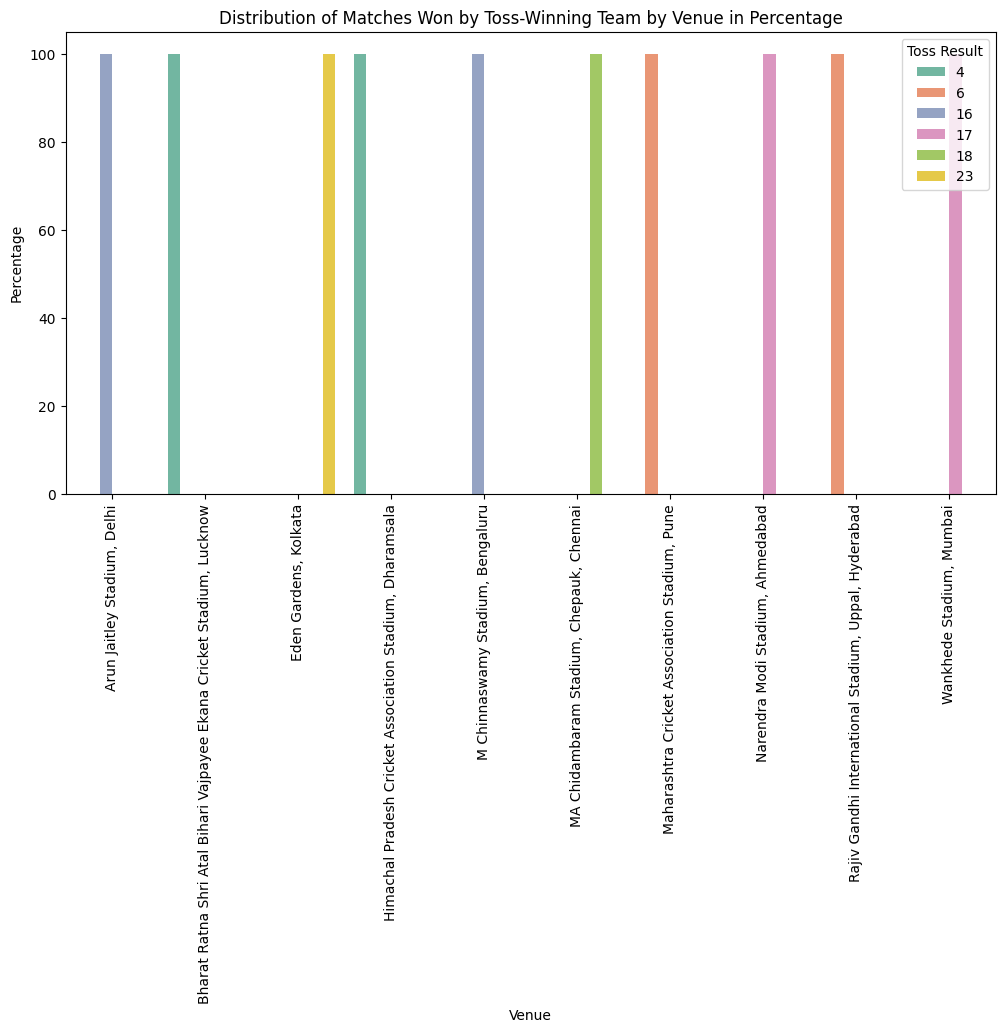

In [ ]:

# Calculate the percentage of matches won at each venue
venue_percentage = df.groupby(['venue', 'won_after_bat_first']).size() / df.groupby('venue').size() * 100
venue_percentage = venue_percentage.reset_index(name='percentage')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='venue', y='percentage', hue='won_after_bat_first', data=venue_percentage, palette='Set2')
plt.title('Distribution of Matches Won by Toss-Winning Team by Venue in Percentage')
plt.xlabel('Venue')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Toss Result', loc='upper right')
plt.show()

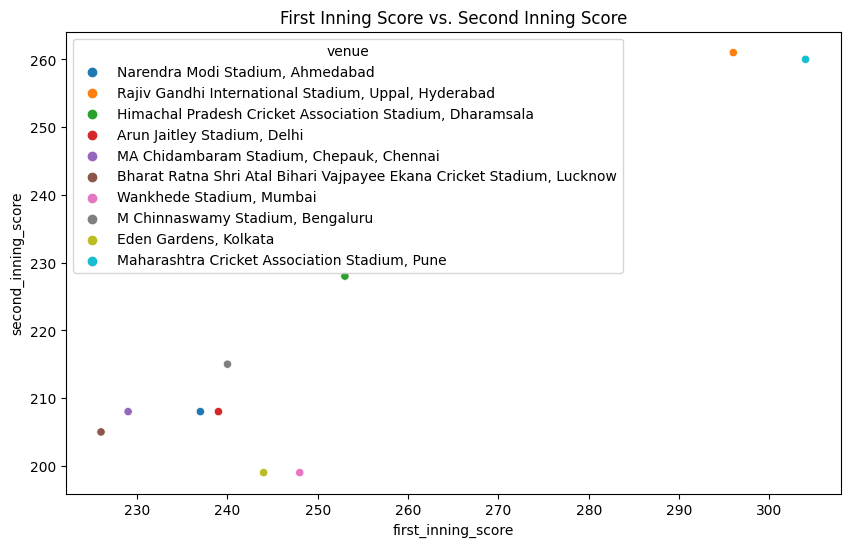

In [ ]:
# Scatter plot for First Inning Score vs. Second Inning Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='first_inning_score', y='second_inning_score', hue='venue', data=df)
plt.title('First Inning Score vs. Second Inning Score')
plt.show()

In [ ]:
df_stadium_details.columns

Index(['venue', 'won_after_bat_first', 'won_after_chase', 'first_inning_score',
       'second_inning_score'],
      dtype='object')

### World_cup_batting visualization

In [ ]:
df_batting[['100', '50', '0']] = df_batting[['100', '50', '0']].replace('-', 0)

# Convert the columns to numeric (in case they are not already)
df_batting[['100', '50', '0']] = df_batting[['100', '50', '0']].apply(pd.to_numeric, errors='coerce')


df_batting.columns
df = df_batting

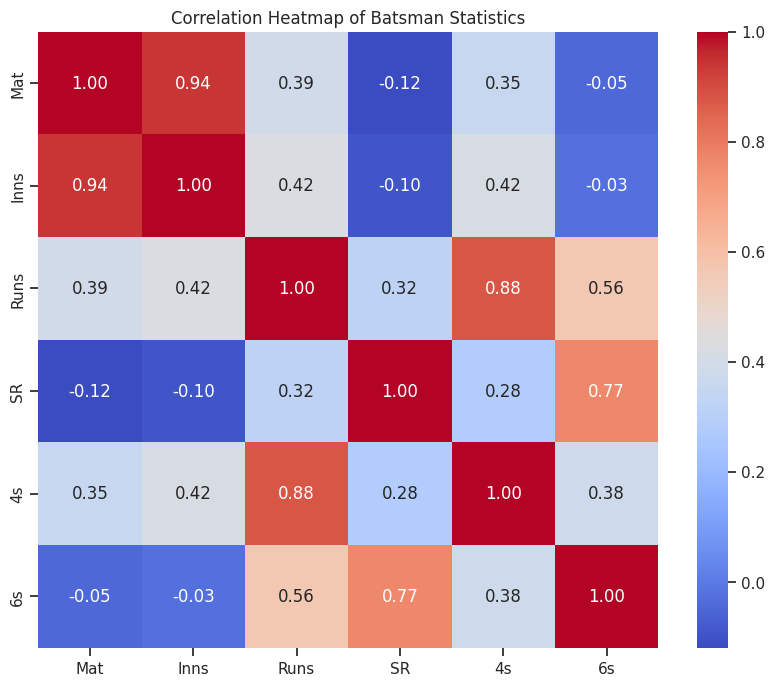

In [ ]:
# Assuming you have a DataFrame named 'df'
correlation_matrix = df[['Mat', 'Inns', 'Runs', 'SR', '4s', '6s']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Batsman Statistics')
plt.show()

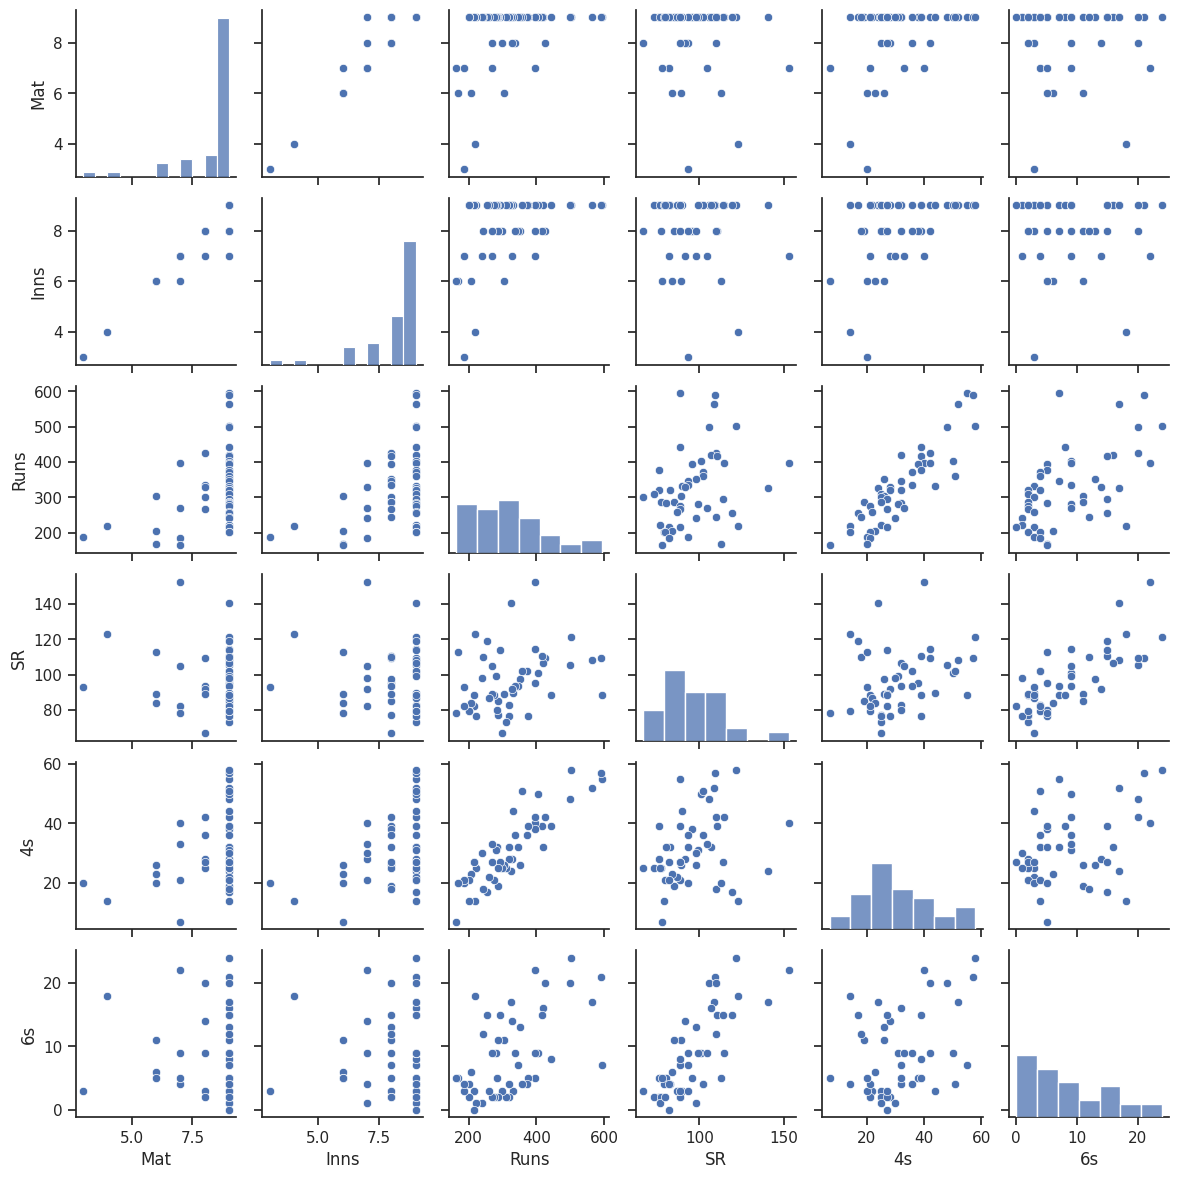

In [ ]:
numerical_vars = ['Mat', 'Inns', 'Runs', 'SR', '4s', '6s']
sns.set(style="ticks")
sns.pairplot(df[numerical_vars], height=2)
plt.show()

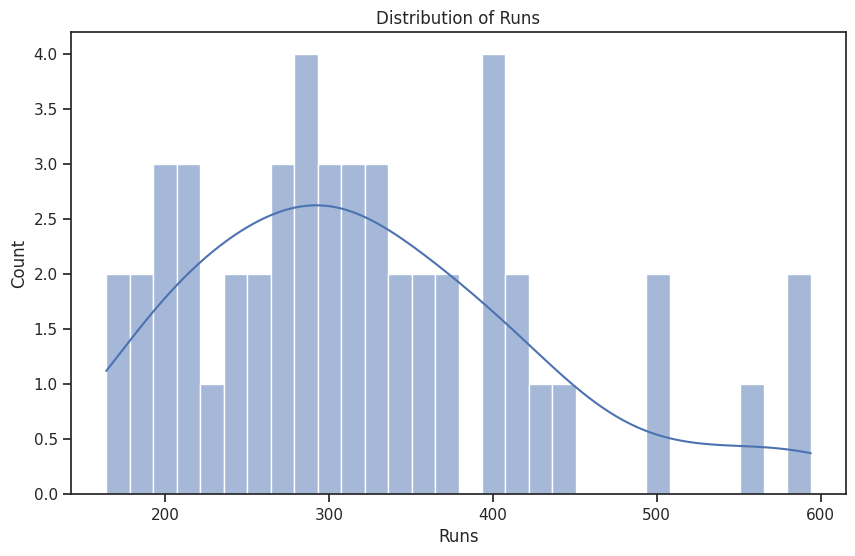

In [ ]:
# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Runs'], bins=30, kde=True)
plt.title('Distribution of Runs')
plt.show()

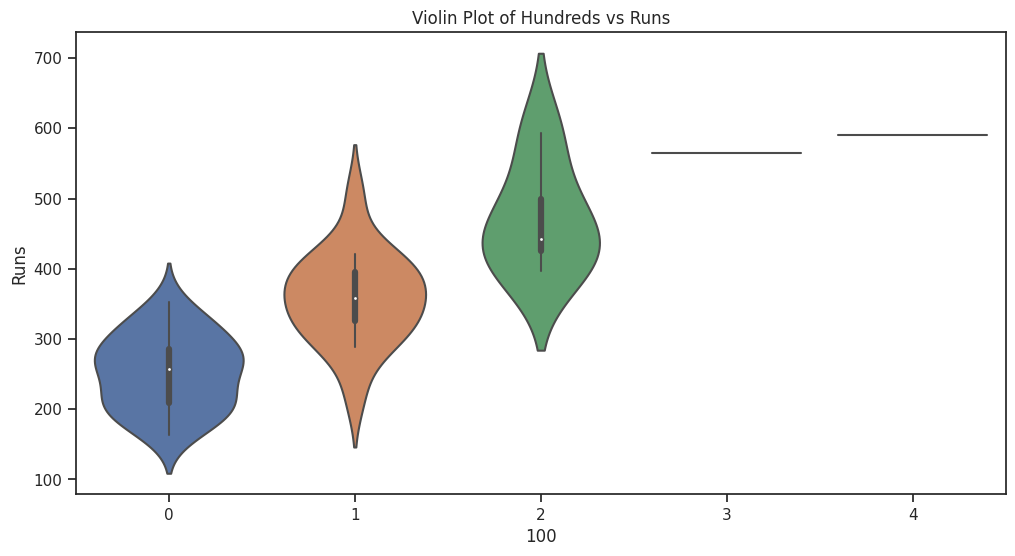

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='100', y='Runs', data=df)
plt.title('Violin Plot of Hundreds vs Runs')
plt.show()

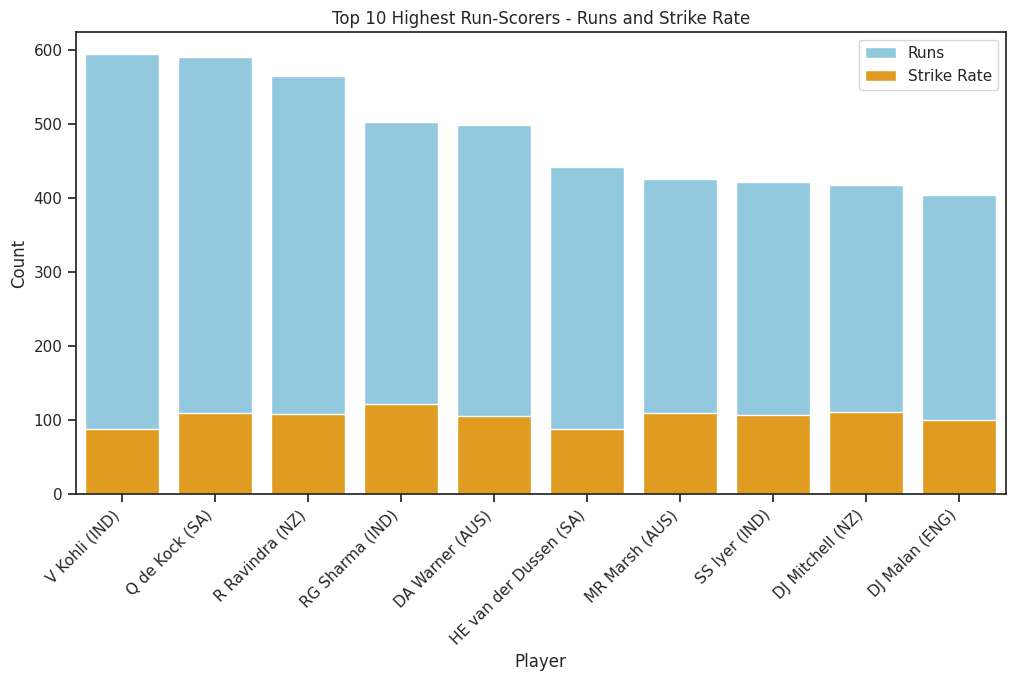

In [ ]:
top_10_players = df.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='Runs', data=top_10_players, color='skyblue', label='Runs')
sns.barplot(x='Player', y='SR', data=top_10_players, color='orange', label='Strike Rate')
plt.title('Top 10 Highest Run-Scorers - Runs and Strike Rate')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

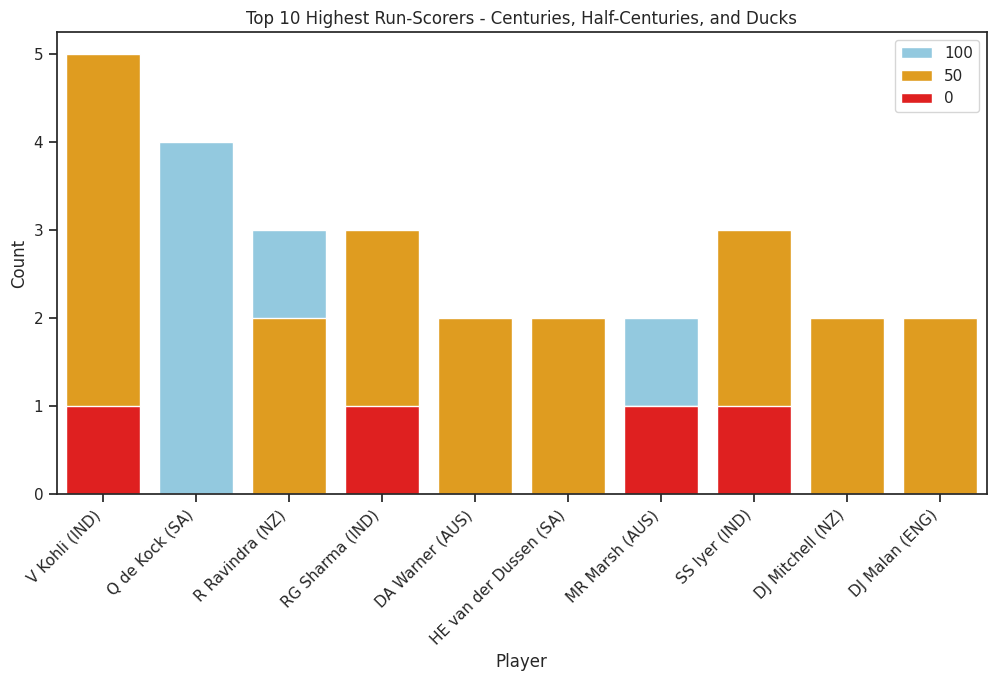

In [ ]:
top_10_players = df.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='100', data=top_10_players, color='skyblue', label='100')
sns.barplot(x='Player', y='50', data=top_10_players, color='orange', label='50')
sns.barplot(x='Player', y='0', data=top_10_players, color='red', label='0')

plt.title('Top 10 Highest Run-Scorers - Centuries, Half-Centuries, and Ducks')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

### Prev_data_percentages visualization

In [ ]:
df_prev_data_per.columns
df = df_prev_data_per

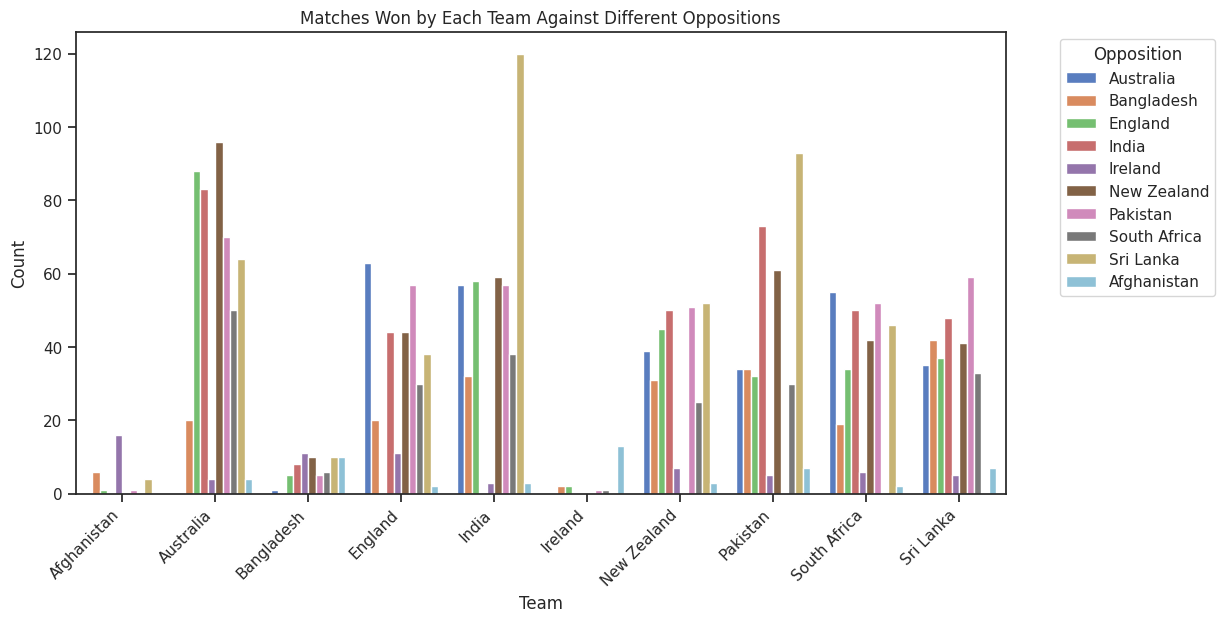

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Won', hue='Opposition', data=df, palette='muted')
plt.title('Matches Won by Each Team Against Different Oppositions')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Opposition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

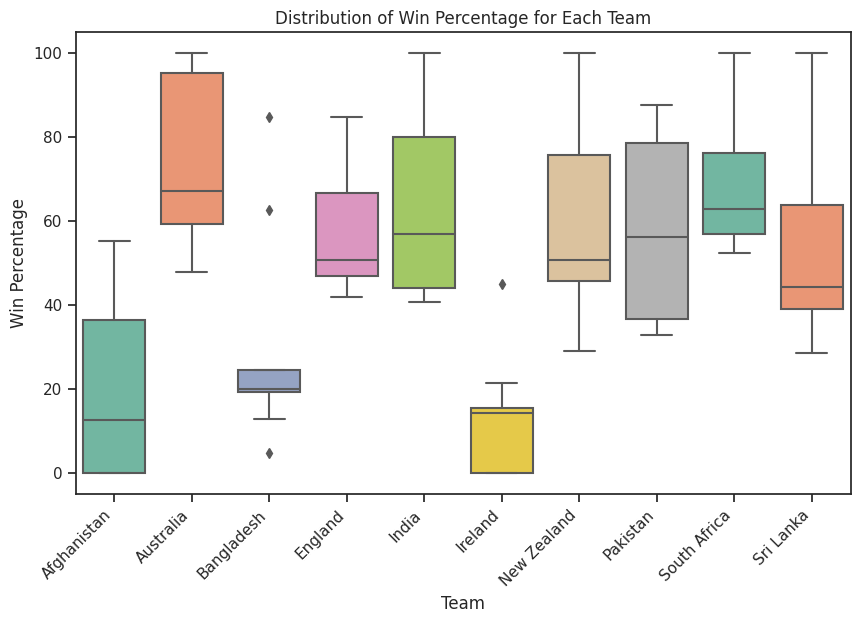

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Team', y='%', data=df, palette='Set2')
plt.title('Distribution of Win Percentage for Each Team')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

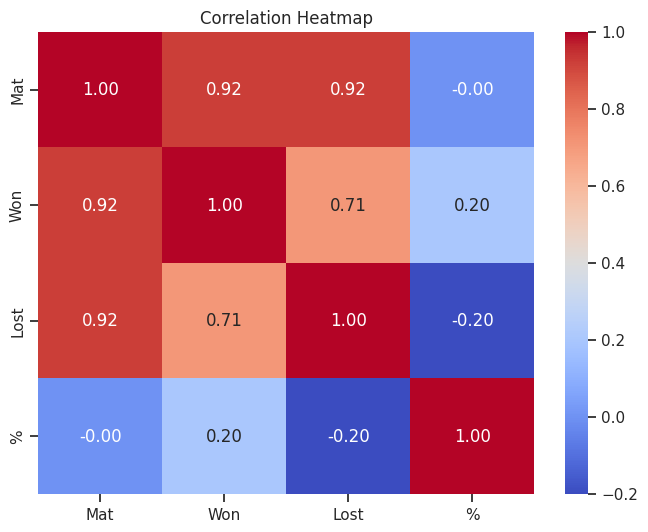

In [ ]:
correlation_matrix = df[['Mat', 'Won', 'Lost', '%']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Ball by Ball deliveries Visualization

In [ ]:
df = df_deliveries
df_deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

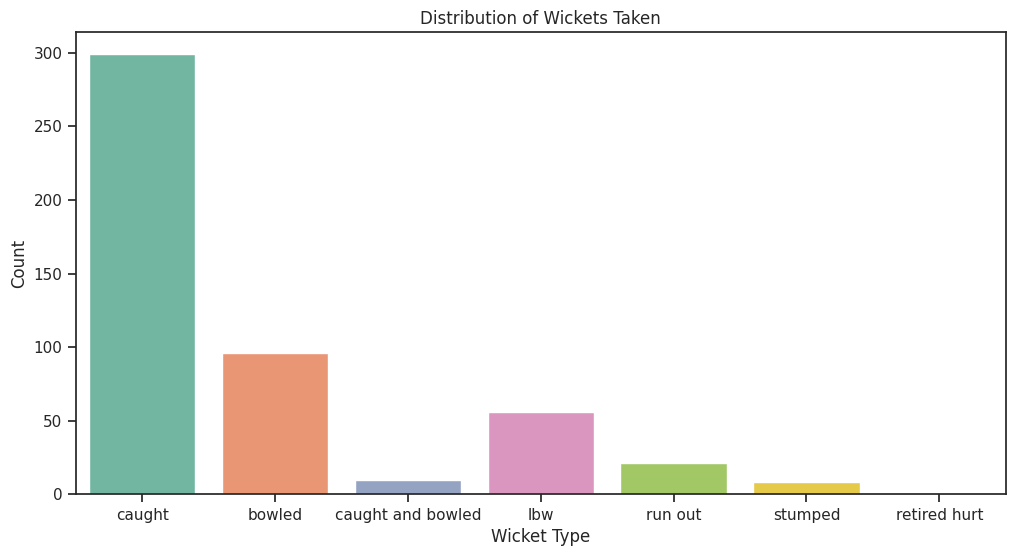

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='wicket_type', data=df, palette='Set2')
plt.title('Distribution of Wickets Taken')
plt.xlabel('Wicket Type')
plt.ylabel('Count')
plt.show()

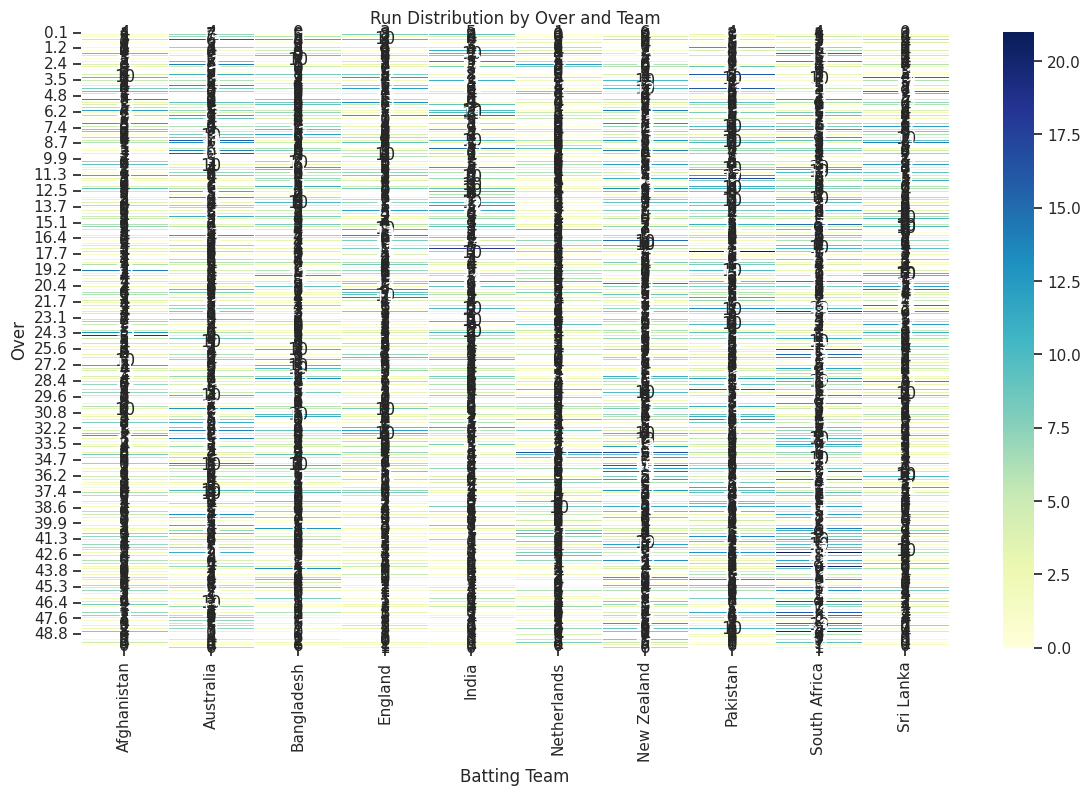

In [ ]:
import numpy as np

plt.figure(figsize=(14, 8))
run_heatmap = df.pivot_table(index='ball', columns='batting_team', values='runs_off_bat', aggfunc=np.sum)
sns.heatmap(run_heatmap, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Run Distribution by Over and Team')
plt.xlabel('Batting Team')
plt.ylabel('Over')
plt.show()

### Bowler data Visualization

In [ ]:
df_bowling.columns
df = df_bowling

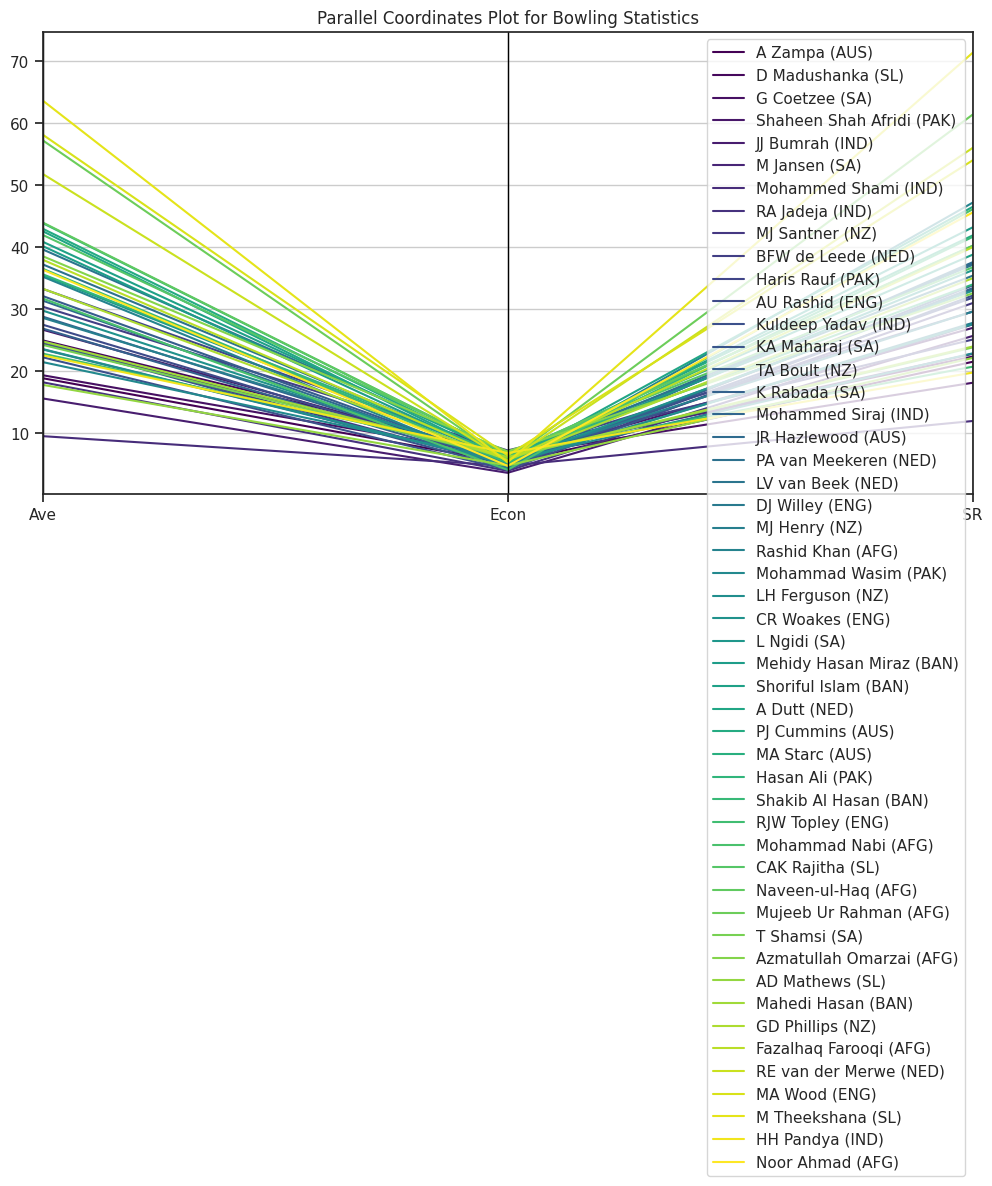

In [ ]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))
parallel_coordinates(df[['Player', 'Ave', 'Econ', 'SR']], 'Player', colormap='viridis')
plt.title('Parallel Coordinates Plot for Bowling Statistics')
plt.show()

### Matches Data Visualization

In [ ]:
df_matches.columns
df = df_matches

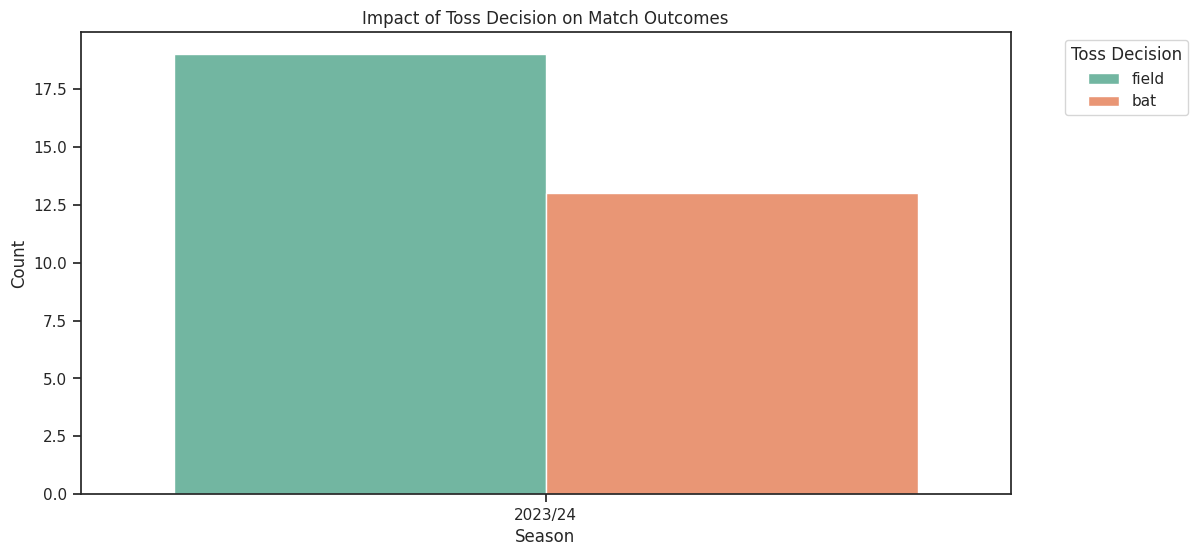

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='season', hue='toss_decision', data=df, palette='Set2')
plt.title('Impact of Toss Decision on Match Outcomes')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Toss Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dis

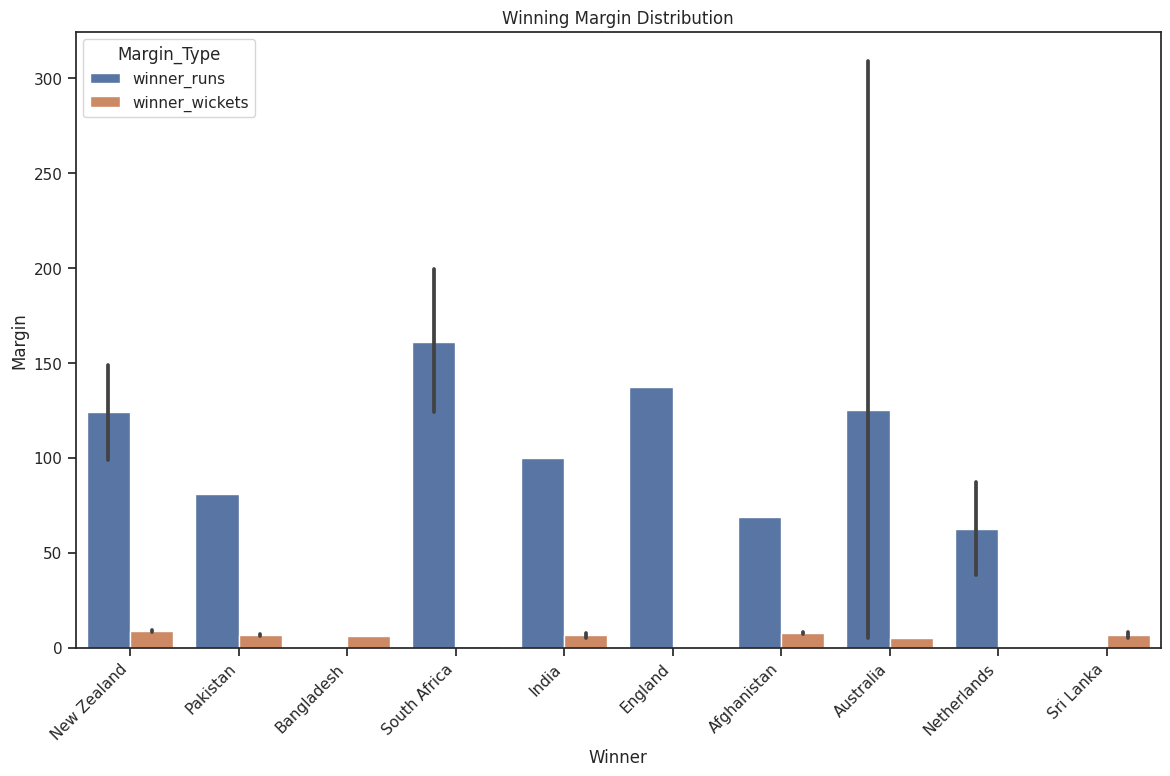

In [ ]:
# Create a new DataFrame to combine runs and wickets for each winner
winning_margin_df = pd.melt(df, id_vars='winner', value_vars=['winner_runs', 'winner_wickets'], var_name='Margin_Type', value_name='Margin')

plt.figure(figsize=(14, 8))
sns.barplot(x='winner', y='Margin', hue='Margin_Type', data=winning_margin_df)
plt.title('Winning Margin Distribution')
plt.xlabel('Winner')
plt.ylabel('Margin')
plt.xticks(rotation=45, ha='right')
plt.show()

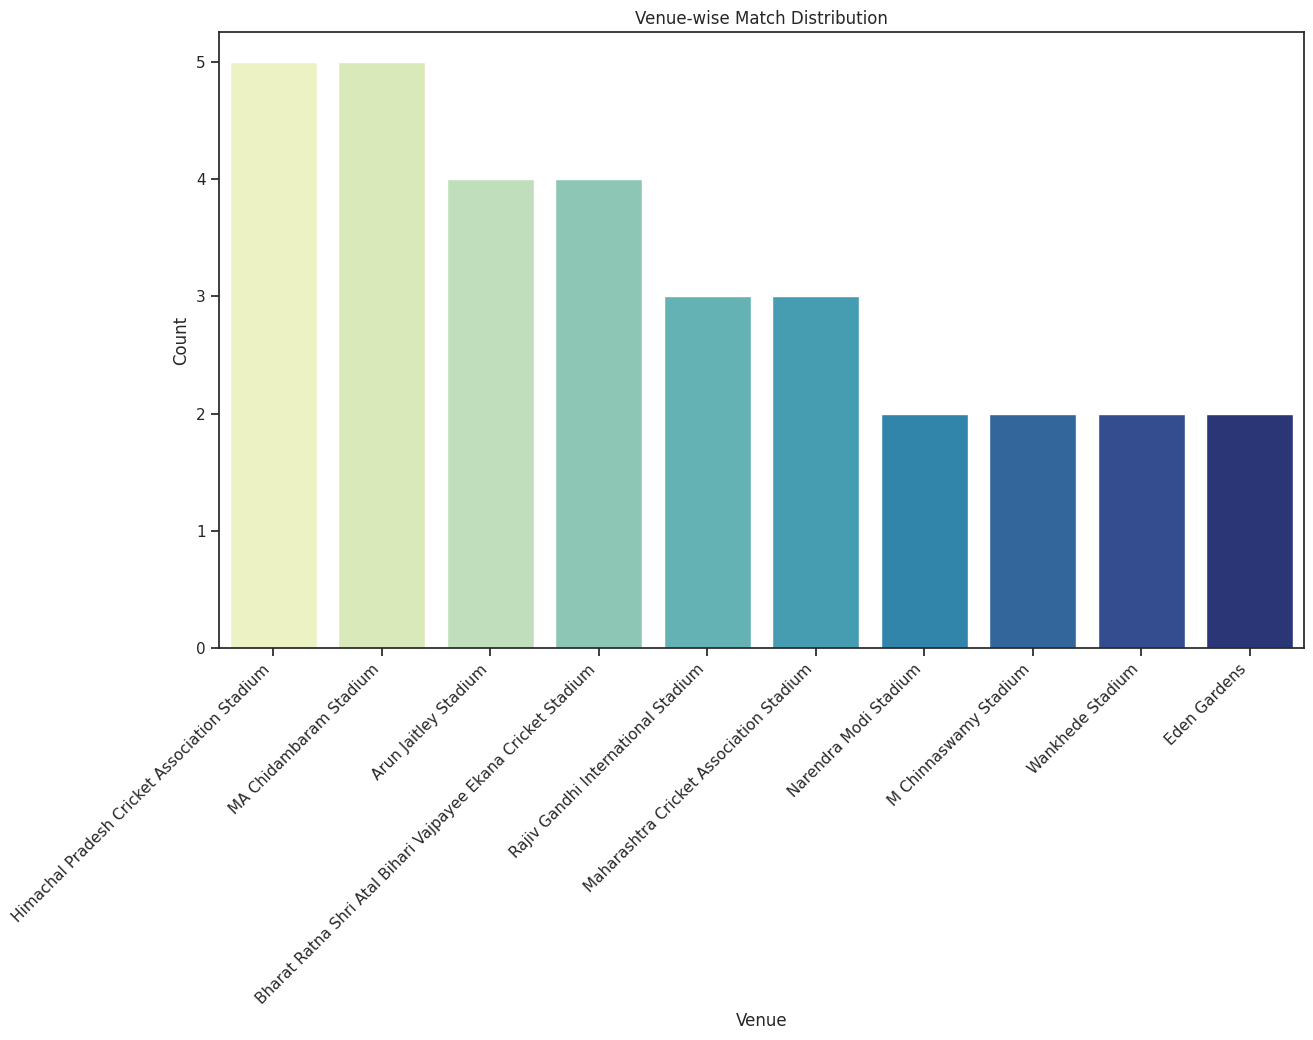

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='venue', data=df, order=df['venue'].value_counts().index, palette='YlGnBu')
plt.title('Venue-wise Match Distribution')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Points Table data visualization

In [ ]:
df_points_table.columns
df = df_points_table

<ipython-input-123-936a19d9a8d4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Team', y='Matches', data=df, hue='Won', palette='viridis', ci=None)


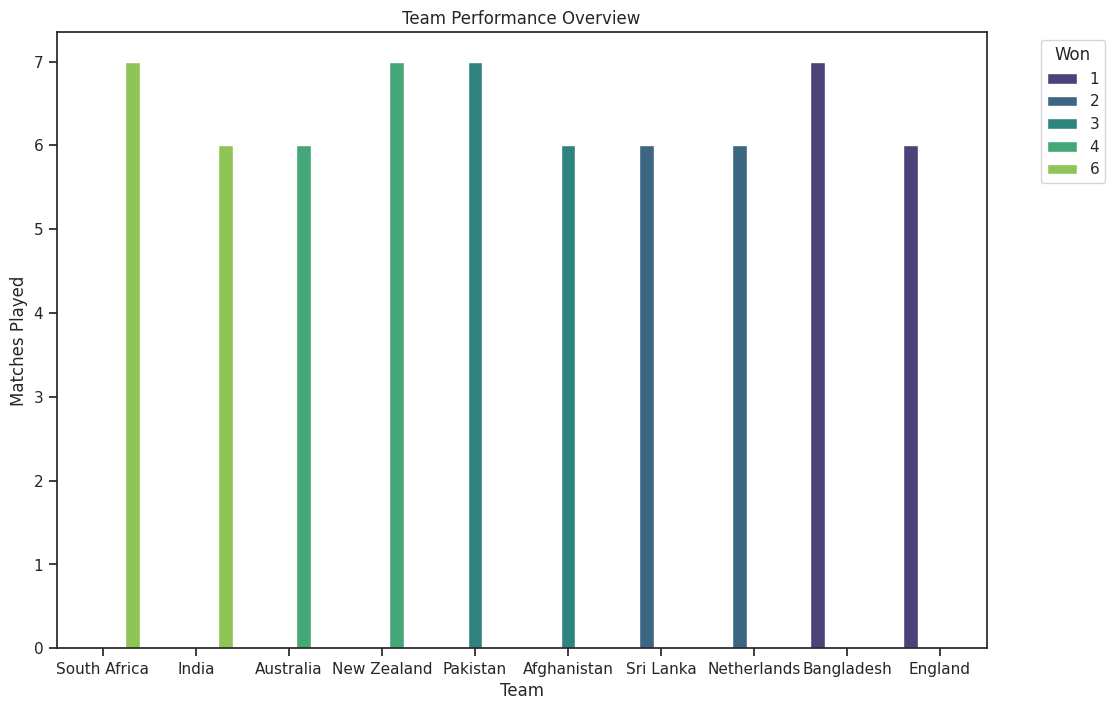

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Team', y='Matches', data=df, hue='Won', palette='viridis', ci=None)
plt.title('Team Performance Overview')
plt.xlabel('Team')
plt.ylabel('Matches Played')
plt.legend(title='Won', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()